# Assessment 1 

## Random Forest

The aim of this report is to create a model to predicting normal vs non-normal traffic. The analysis is based onThe analysis will take place on the `KD99 (small, 10%) dataset`.

In the previous report, we have done datacleaning, which includes formatting data and creating dummy variables.(See report 02-05)

### Import packages

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, PrecisionRecallDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2

import matplotlib.pyplot as plt
import seaborn as sns

### Import data

In [2]:
# df = pd.read_csv("../data/processed/test_train.zip").drop(columns = ['Unnamed: 0'])
df = pd.read_csv("test_train.zip").drop(columns = ['Unnamed: 0'])
df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_is_S2,flag_is_S0,flag_is_S3,flag_is_RSTO,flag_is_RSTR,flag_is_RSTOS0,flag_is_OTH,flag_is_SH,normal,test
0,0,181,5450,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,True,0.0
1,0,239,486,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,True,0.0
2,0,235,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,True,0.0
3,0,219,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,True,0.0
4,0,217,2032,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,True,0.0


Now we have 118 features and 2 targets, to make a better understanding of the data and imporve the performance of the model, we need to select the feaure to reduce the dimension of the data.

### Feature selection

Feature selection is to select the relevant feature, which can: 
- reduce the risk of overfitting, imporve the performance of the model
- decrease the time of training data
- provide interpretability of the model

#### Univariate feature selection: 

In [3]:
X = df.iloc[:,0:118]  #independent columns
y = df.iloc[:,-2]    #target column i.e price range
#apply SelectKBest class to sort features
bestfeatures = SelectKBest(score_func=chi2, k='all') 
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
featureScores = featureScores.sort_values(by = ['Score'], ascending = False)
featureScores

,Feature,Score
2,dst_bytes,8.829314e+08
1,src_bytes,1.397826e+08
0,duration,7.183132e+07
19,count,3.829637e+07
20,srv_count,3.287980e+07
...,...,...
36,dst_host_rerror_rate,3.345676e-01
116,flag_is_OTH,2.616034e-01
103,service_is_pm_dump,2.451915e-01
16,num_outbound_cmds,NaN


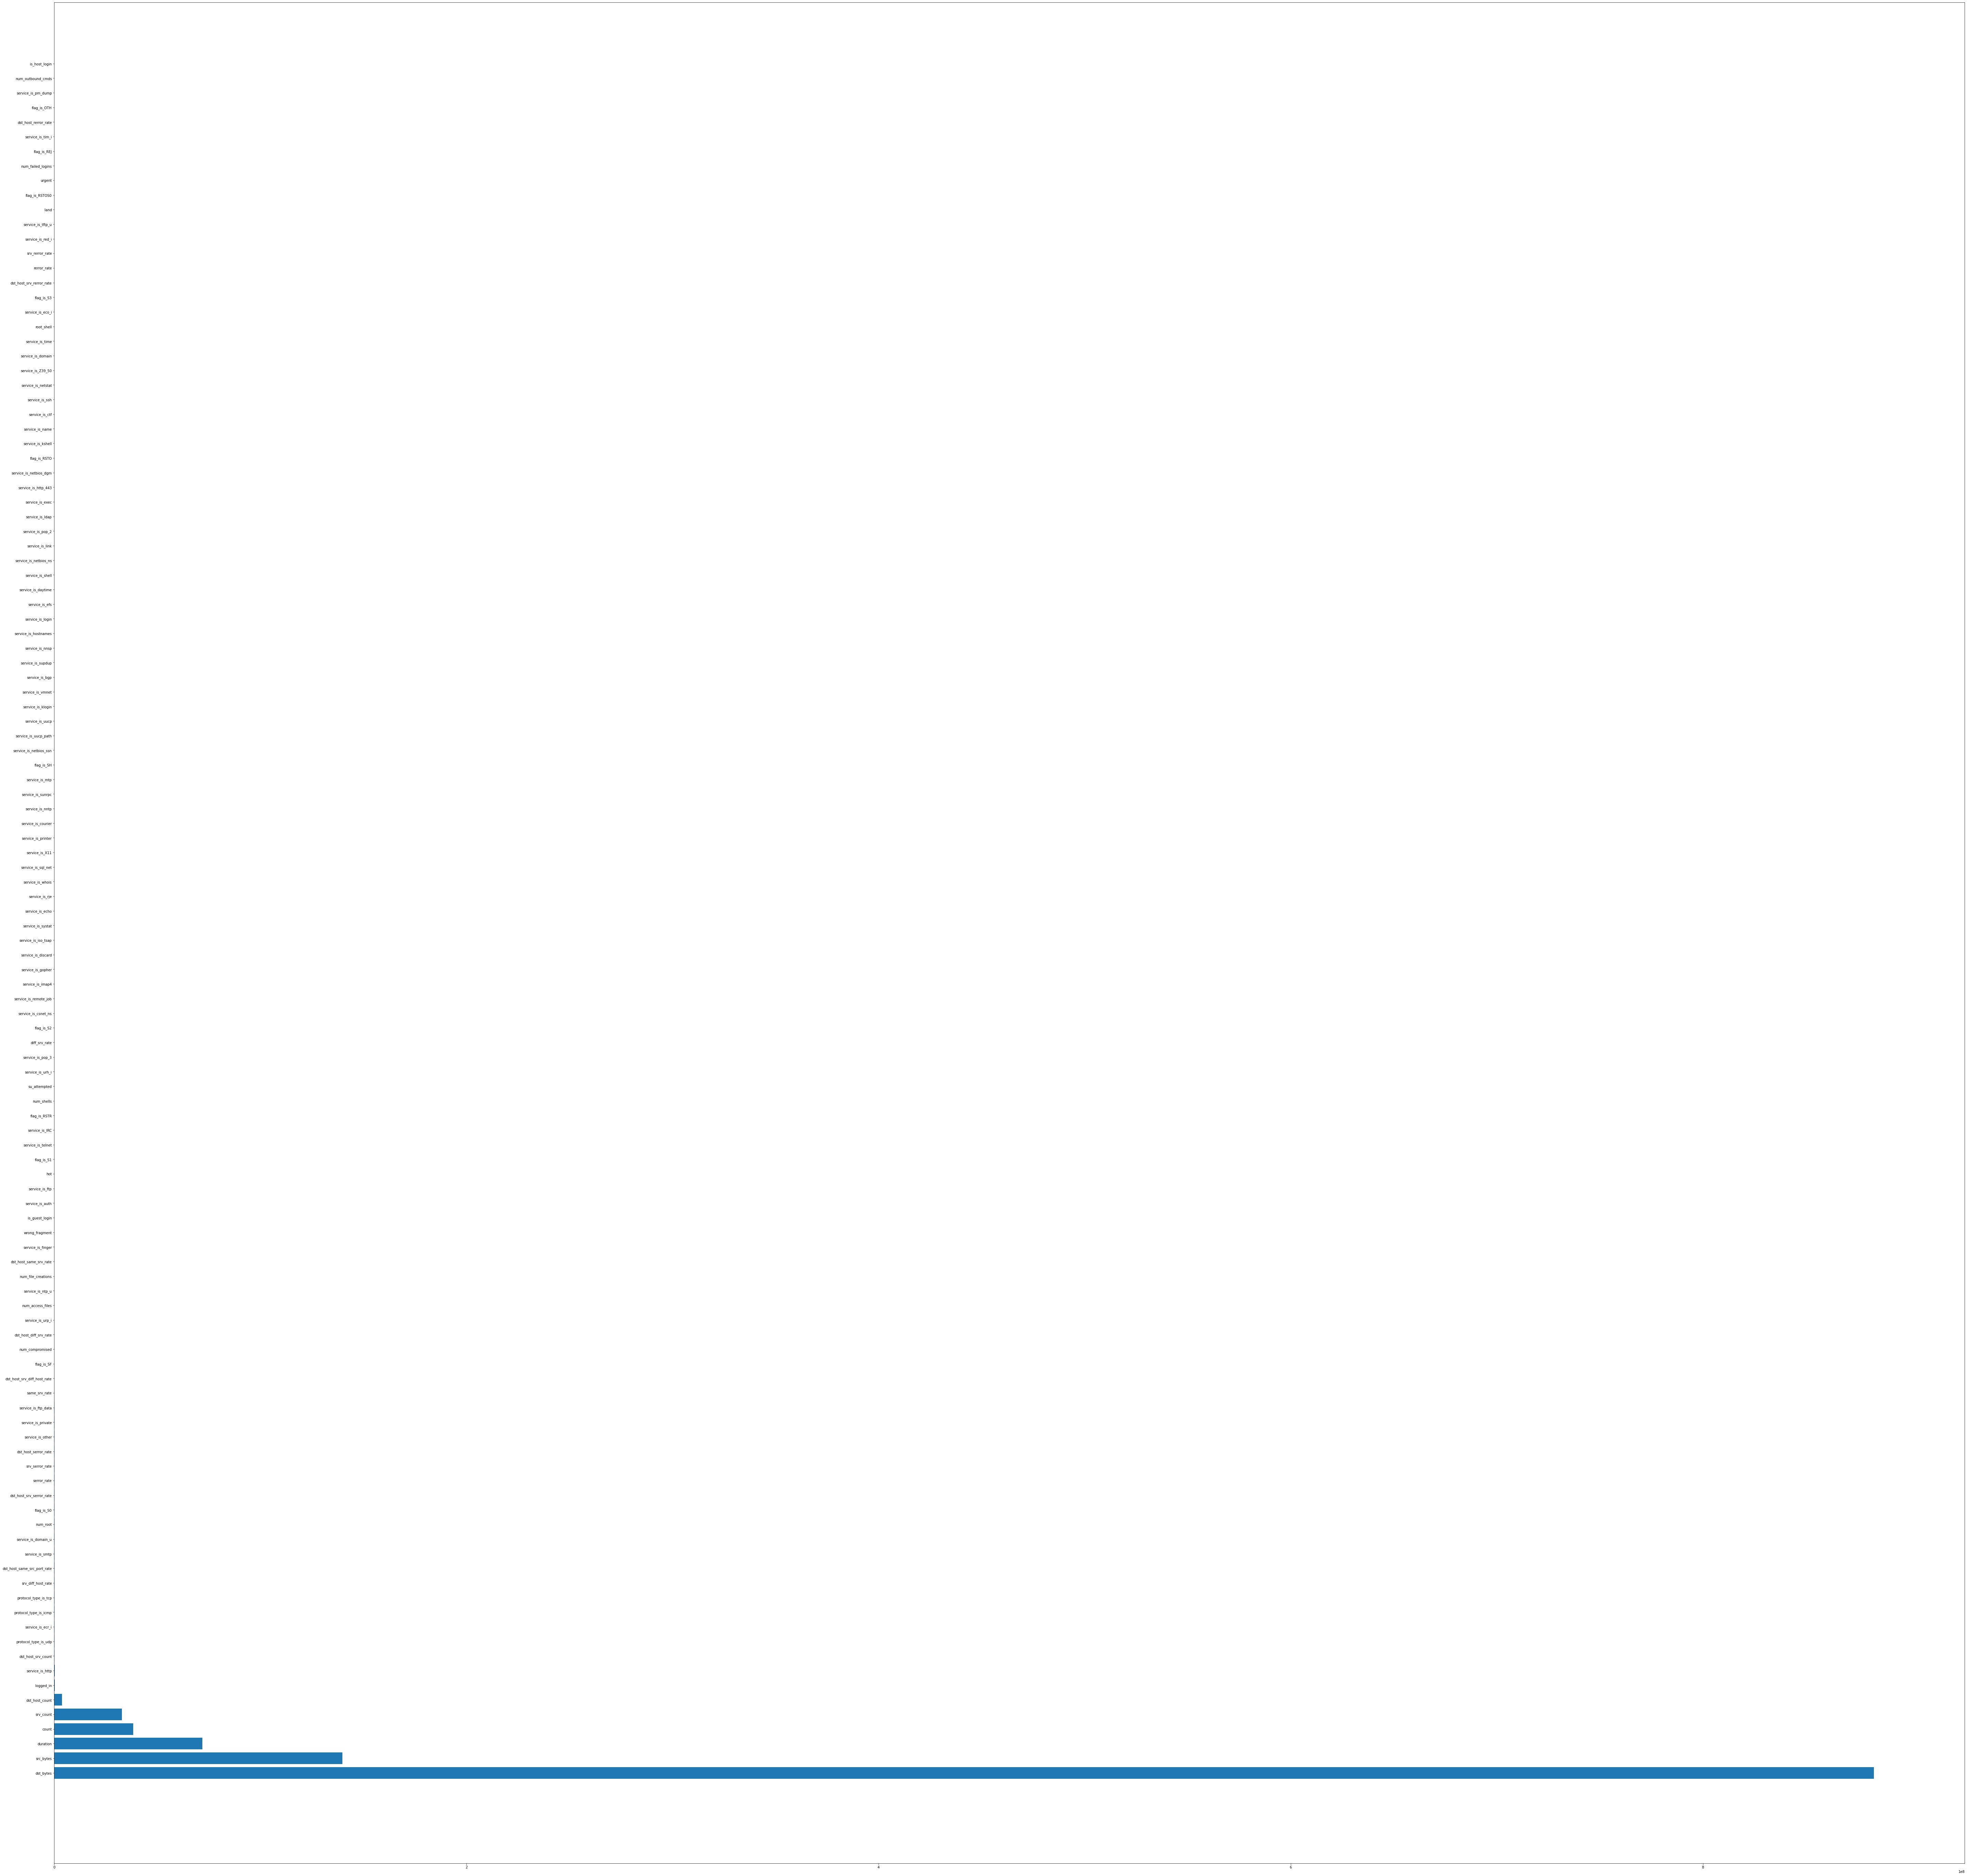

In [4]:
names = featureScores['Feature'].tolist()
scores = featureScores['Score'].tolist()
plt.figure(figsize=(100,100))
plt.barh(range(len(scores)), scores,tick_label = names)
plt.show()

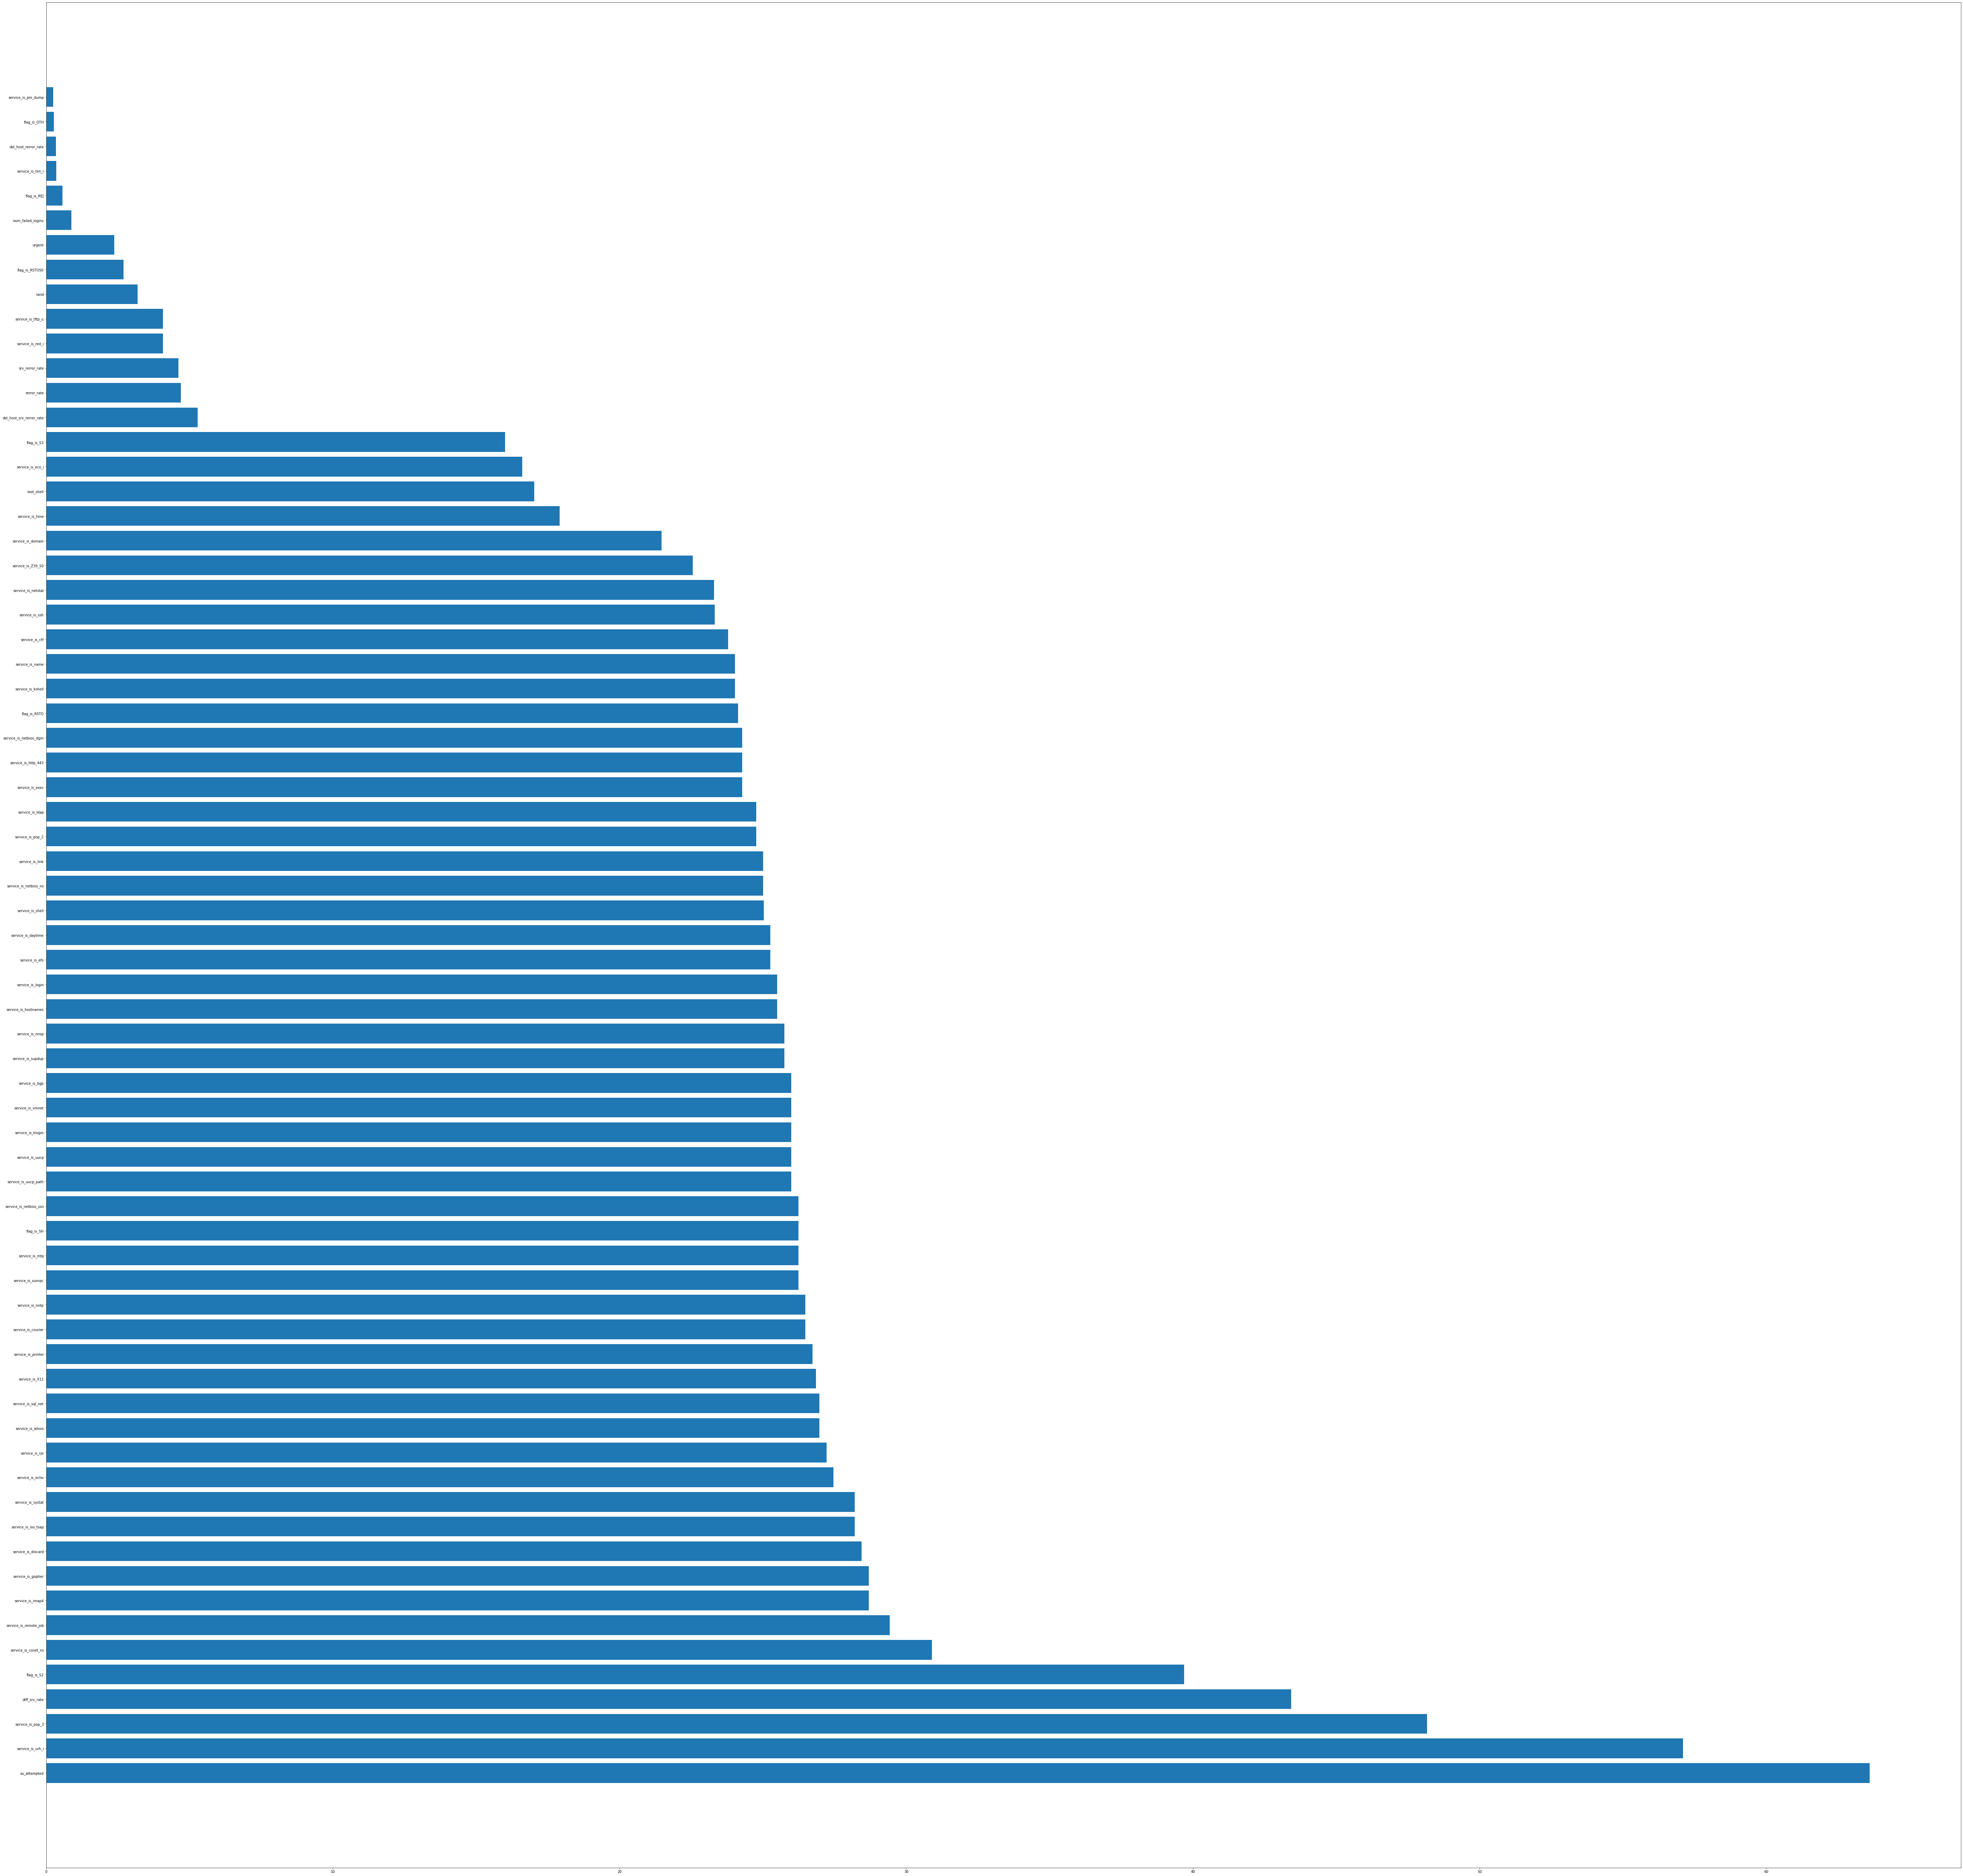

In [5]:
new_featureScores = featureScores[featureScores.Score <100]    # Remove the largest scores to see the lower scores

names = new_featureScores['Feature'].tolist()
scores = new_featureScores['Score'].tolist()
plt.figure(figsize=(100,100))
plt.barh(range(len(scores)), scores,tick_label = names)
plt.show()

Remove the last 16 features which has small or no scores

In [6]:
features1  = featureScores.iloc[:-16, 0].tolist()
len(features1)

102

After univariate feature selection, we have 102 features left 

### Implentment Random Forset model

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[features1].iloc[:,:-2], df['test'], test_size=0.20, random_state=42)

In [8]:
X_test.to_csv('X_test.csv')
y_test.to_csv('y_test.csv')

In [ ]:
# kf = KFold(n_splits = 10, shuffle = True, random_state = 10)

# for train_index, test_index in kf.split(X_train):
#     print('train index is : {}'.format(train_index))
#     print('validation index is : {}'.format(test_index) )
#     print('-'*20)

In [9]:
# clf = RandomForestClassifier()
# clf.fit(X_train, y_train)

# # Read the csv test file

# pred = clf.predict(X_test)
# # accuracy
# # accuracy = accuracy_score(pred, y_test)
# print(clf)
# # print(accuracy)
# print(classification_report(pred, y_test, labels=None))

RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19364
         1.0       1.00      1.00      1.00     78355
         2.0       0.96      0.98      0.97       229
         3.0       0.83      0.91      0.87        11
         4.0       0.99      1.00      1.00       846

    accuracy                           1.00     98805
   macro avg       0.96      0.98      0.97     98805
weighted avg       1.00      1.00      1.00     98805



In [10]:
# this chunk will take a long time and the result is show in the next chunk, so running this chunk is not necessary
clf = RandomForestClassifier()
param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)
CV_rfc.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
CV_rfc.best_params_

In [ ]:
best_clf = RandomForestClassifier(criterion= 'gini', max_features= 'sqrt', n_estimators= 200)

In [ ]:
best_clf.fit(X_train, y_train)
pred = best_clf.predict(X_test)

In [ ]:
print(classification_report(pred, y_test, labels=None))

In [128]:
pred

array([1., 1., 1., ..., 0., 1., 0.])

In [129]:
pred_randomForest = pd.DataFrame(pred)

In [130]:
pred_randomForest

,0
0,1.0
1,1.0
2,1.0
3,0.0
4,1.0
...,...
98800,1.0
98801,0.0
98802,0.0
98803,1.0


In [141]:
pred_randomForest.to_csv('pred_randomForest.csv')
y_test.to_csv('y_test.csv')

## Evaluation

In [86]:
# df = pd.read_csv("../data/processed/test_train.zip").drop(columns = ['Unnamed: 0'])
y_test = pd.read_csv('../data/processed/y_test.zip').drop(columns = ['Unnamed: 0'])
pred_randomForest = pd.read_csv('../data/processed/pred_randomForest.zip').drop(columns = ['Unnamed: 0'])
# y_test = pd.read_csv('y_test.zip').drop(columns = ['Unnamed: 0'])
# pred_randomForest = pd.read_csv('pred_randomForest.zip').drop(columns = ['Unnamed: 0'])

- The precision is the ratio $ TP / (TP + FP) $ where TP is the number of true positives and FP the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
The best value is 1 and the worst value is 0.[3]

- The recall is the ratio $ TP / (TP + FN) $ where TP is the number of true positives and FN the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
The best value is 1 and the worst value is 0.[4]

- The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is: \
$ F1 = 2 * (precision * recall) / (precision + recall) $ [5]

In this case, apply `average="weighted"` which 'Calculate metrics for each label, and find their average, weighted by support (the number of true instances for each label).'

In [87]:
def scores(score, test):
    precision = precision_score(score, test, average="weighted")
    recall = recall_score(score, test, average="weighted")
    f1 = f1_score(score, test, average="weighted")
    return precision, recall, f1

In [88]:
precision, recall, f1 = scores(pred_randomForest, y_test)
print('Precision is: ', precision)
print('Recall is: ', recall)
print('F1-score is: ', f1)

Precision is:  0.999713739680422
Recall is:  0.9997064925864075
F1-score is:  0.999708952843785


#### Confussion Matrix

[[19347     0     4     0     2]
 [    0 78355     0     0     0]
 [   12     0   222     1     0]
 [    2     0     0    10     0]
 [    8     0     0     0   842]]


Text(33.0, 0.5, 'True value')

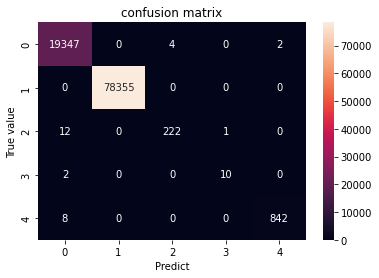

In [89]:
conf_mat = confusion_matrix(y_test, pred_randomForest, labels=[float(i) for i in range(5)])
print(conf_mat)
label=['normal', 'DOS', 'R2L', 'U2R', 'probing']
f,ax=plt.subplots()
sns.heatmap(conf_mat,annot=True,ax=ax,fmt='g')
ax.set_title('confusion matrix')
ax.set_xlabel('Predict')
ax.set_ylabel('True value')


As the aim of this assessment is only to detect non-normal data, in the folowing I'll turn the result into `normal/non-normal`, which is, the result is 0 when attack type is 0, and 1 otherwise.  

In [131]:
pred = pred_randomForest
true = y_test

In [132]:
pred['normal'] =0

for i in range(pred_randomForest.shape[0]):
    if pred.iloc[i, 0] == 0.:
        pred.at[i,'normal'] = 1
pred = pred.drop(columns = [0])

In [136]:
pred

,normal
0,0
1,0
2,0
3,1
4,0
...,...
98800,0
98801,1
98802,1
98803,0


In [137]:
true['normal'] =0

for i in range(true.shape[0]):
    if true.iloc[i, 0] == 0.:
        true.at[i,'normal'] = 1
true = true.drop(columns = ['test'])

In [140]:
true

,normal
0,0
1,0
2,0
3,1
4,0
...,...
98800,0
98801,1
98802,1
98803,0


In [148]:
precision, recall, f1 = scores(pred, true)
print('Precision is: ', precision)
print('Recall is: ', recall)
print('F1-score is: ', f1)

Precision is:  0.9997065009920009
Recall is:  0.9997064925864075
F1-score is:  0.9997064381325971


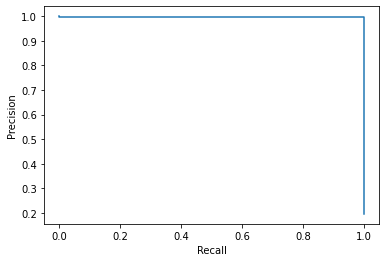

In [147]:
precision2, recall2, _ = precision_recall_curve(true, pred)
curve = PrecisionRecallDisplay(precision=precision2, recall=recall2)
curve.plot()

In [149]:
true.to_csv("true.csv")
pred.to_csv("pred.csv")

Reference: \
[1] https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html \
[2] https://www.kaggle.com/sociopath00/random-forest-using-gridsearchcv

[3] https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html \
[4] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html \
[5] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score \
[6] https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html \
[7] https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea \
[8] https://zhuanlan.zhihu.com/p/126278814 \